not gaussian


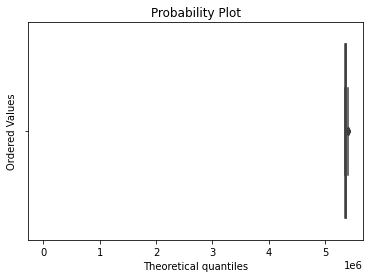

In [35]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import numpy as np
import pylab
import scipy.stats as stats
import seaborn as sns
import math
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_max
from scipy.stats import weibull_min


with open('costs.txt') as f:
    costs = f.read()
cost_list = [float(c) for c in costs.strip('][').split(',')]  # 1000 costs
cost_list = np.array(cost_list)

# remove the outlier
cost_list = cost_list[cost_list>5000000]  # remaining 998
#cost_log = [math.log(c) for c in cost_list]

# 1. Quantile-Quantile Plot
stats.probplot(cost_list, dist="norm", plot=pylab)

# 2. Box Plot
ax = sns.boxplot(x=cost_list)

# 3. Shapiro-Wilk Test
stat,p = shapiro(cost_list)
if p>0.05:
    print('probably guassian')
else:
    print('not gaussian')



def check_distribution(y_std):
    chi_square_statistics = []
    # 11 equi-distant bins of observed Data
    percentile_bins = np.linspace(0, 100, 101)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    dist_names = ['weibull_min', 'norm', 'weibull_max', 'beta','invgauss', 'uniform', 'gamma', 'expon','lognorm',
                  'pearson3','triang','exponweib']
    # Loop through candidate distributions
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins) - 1):
            expected_cdf_area = cdf_fitted[bin + 1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)
        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * 2
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = sum(((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
        chi_square_statistics.append(ss)
    # Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)

    print('\nDistributions listed by Betterment of fit:')
    print('............................................')
    print(results)




In [37]:
check_distribution(cost_list)

(0.08750924161360545, 5351295.367537488, 1.5879557252821324)

(5368994.313081956, 10756.4801668904)

(0.08118667708272817, 5404707.62751243, 1.4095673241191111)

(1.9196418411765577, 5.785009272587315, 5351202.019744287, 71580.37963557117)

(45.41569811565688, 5351277.256357461, 16.162626163884298)

(5351295.367537489, 53412.25997493975)

(2.610976111280141, 5350932.519294126, 6917.6404660844155)

(5351295.367537489, 17698.945544466376)

(7.4690339073937455, 5351295.367537488, 10.887538974133168)

(1.2377375130828736, 5368994.313146399, 11177.8799838201)

(0.9999999999962592, 5328153.75466545, 76553.87284741322)

(1.2150859372885976, 0.09241553141463628, 5351295.367537488, 2.1314243241401254)


Distributions listed by Betterment of fit:
............................................
   Distribution    chi_square
8       lognorm  50116.118865
11    exponweib  50131.307074
0   weibull_min  50149.305557
4      invgauss  50193.700330
7         expon  50217.901319
9      pearson3  50244.82943

/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


In [32]:
weibull_max.fit(cost_list)

(0.08118667708272817, 5404707.62751243, 1.4095673241191111)

In [28]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


(loc, scale) = s.exponweib.fit_loc_scale(cost_list, 1, 0.08118667708272817)
print (loc, scale)

x = np.linspace(cost_list.min(), cost_list.max(), 1000)
plt.plot(x, weib(x, loc, scale)*100000)

"""Plot cost distribution on a histogram."""

plt.show()

0 1


/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1790: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1790: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


ZeroDivisionError: division by zero

<ipython-input-19-915e2eec8da0>:2: RuntimeWarning: invalid value encountered in power
  return (a / n) * (-x / n)**(a - 1) * np.exp(-(-x / n)**a)


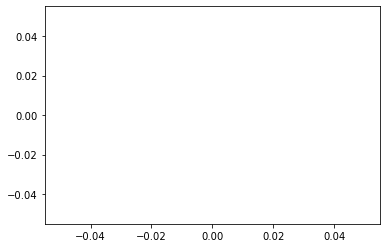

No handles with labels found to put in legend.


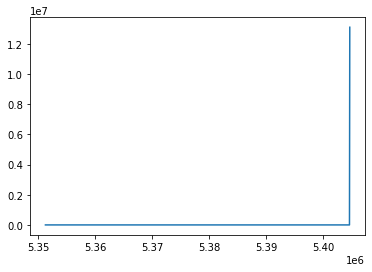

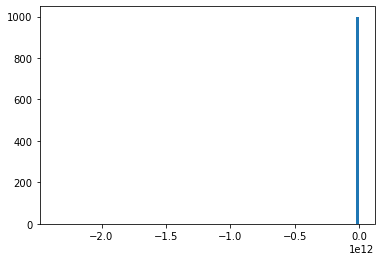

In [19]:
def weib(x,n,a):
    return (a / n) * (-x / n)**(a - 1) * np.exp(-(-x / n)**a)
x = np.linspace(cost_list.min(), cost_list.max(), 1000)
#y = weibull_max.pdf(x, shape, loc, scale)
plt.plot(x,weib(x,loc,scale))
plt.show()

c, loc, scale = weibull_max.fit(cost_list)
fig, ax = plt.subplots(1, 1)
ax.plot(x, weibull_max.pdf(x, c, loc, scale))

fig, ax = plt.subplots(1, 1)
c2 = c[c>=0]
r = weibull_max.rvs(c2, loc, scale, size=1000)
ax.hist(r, bins=100)
ax.legend(loc='best', frameon=False)
#ax.show()